<a href="https://colab.research.google.com/github/apurv100/diabetes-predictor-updated/blob/master/Copy_of_Copy_of_diabetes_analysis(rf)new2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score # ROC and AUC 
from sklearn.metrics import accuracy_score # Accuracy 
from sklearn.metrics import recall_score # Recall 
from sklearn.metrics import precision_score # Prescison 
from sklearn.metrics import classification_report # Classification Score Report 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

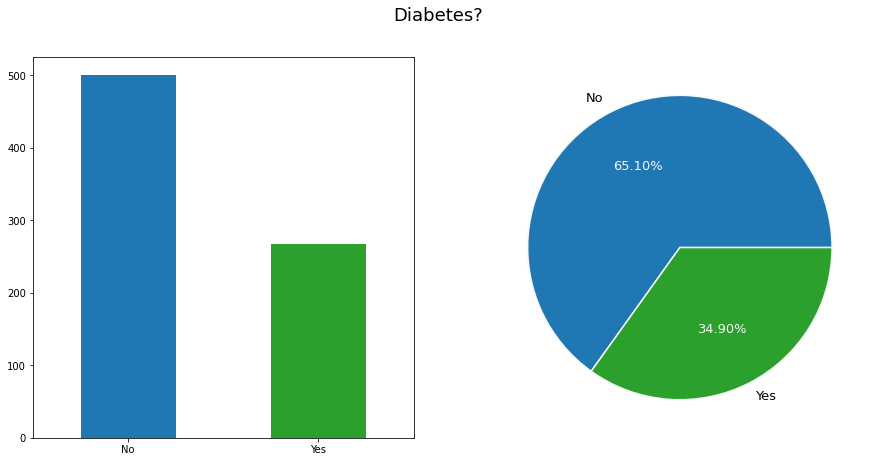

In [5]:

f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = data.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = data.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

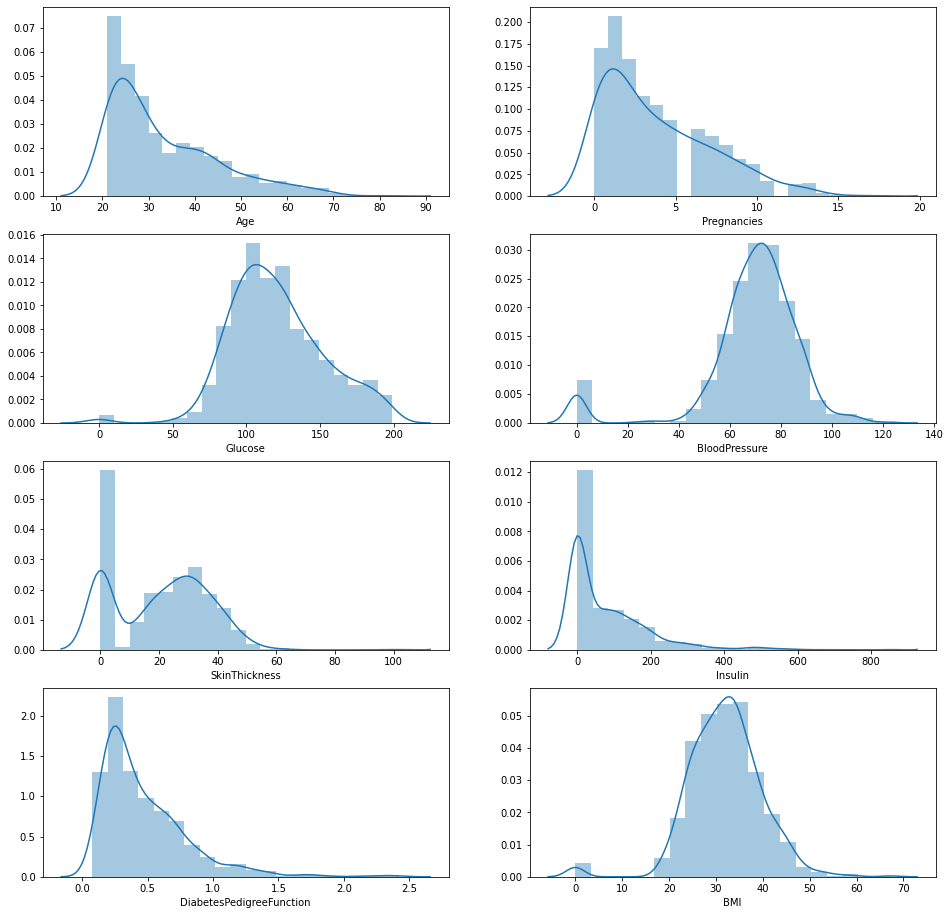

In [6]:

fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(data.BMI, bins = 20, ax=ax[3,1]) 

In [7]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median()
    return temp

In [10]:
features = ["Insulin","Glucose","SkinThickness",'BloodPressure','BMI']
for feature in features:
    print(median_target(feature))

         Insulin
Outcome         
0          102.5
1          169.5
         Glucose
Outcome         
0          107.0
1          140.0
         SkinThickness
Outcome               
0                 27.0
1                 32.0
         BloodPressure
Outcome               
0                 70.0
1                 74.5
          BMI
Outcome      
0        30.1
1        34.3


In [11]:
features = ["Insulin","Glucose","SkinThickness",'BloodPressure','BMI']
for feature in features:
    negative = median_target(feature)[feature][0]
    positive = median_target(feature)[feature][1]
    data.loc[(data['Outcome'] == 0 ) & (data[feature].isnull()), feature] = negative
    data.loc[(data['Outcome'] == 1 ) & (data[feature].isnull()), feature] = positive

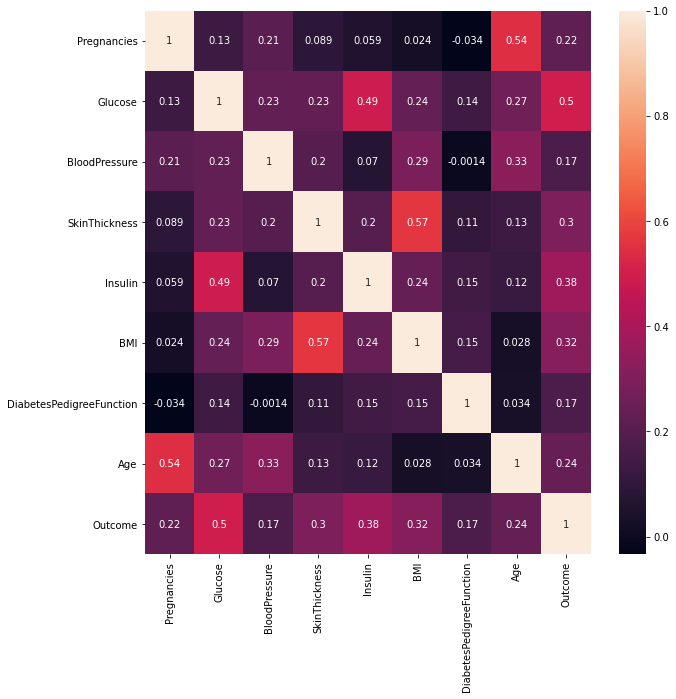

In [12]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
X = data.iloc[:,:-1]
Y = data['Outcome']
X.shape


(768, 8)

In [15]:
Y.shape

(768,)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)


In [17]:
print("Train set: ",X_train.shape,Y_train.shape)
print("Test set: ",X_test.shape,Y_test.shape)

Train set:  (614, 8) (614,)
Test set:  (154, 8) (154,)


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100)
#model.fit(X_train,Y_train)


In [ ]:
##from sklearn.metrics import accuracy_score
##print(accuracy_score(Y_test,model.predict(X_test))*100) 

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

In [19]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [20]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [21]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 500}

In [22]:
Y_pred=CV_rfc.best_estimator_.predict(X_test)

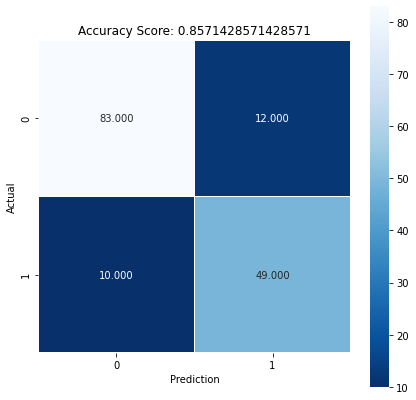

In [23]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred)

plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.title("Accuracy Score: {}".format(accuracy_score(Y_test, Y_pred)))
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [24]:
print("The recall score for prediction is {:0.2f}".format(recall_score(Y_test, Y_pred)))
print("The prescision score for predion is {:0.2f}".format(precision_score(Y_test, Y_pred)))
print("\n")
print(classification_report(Y_test,Y_pred))

The recall score for prediction is 0.83
The prescision score for predion is 0.80


              precision    recall  f1-score   support

           0       0.89      0.87      0.88        95
           1       0.80      0.83      0.82        59

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



Text(0.5, 1.0, 'Precision-Recall curve for Logistic Regression Classifier')

<Figure size 504x504 with 0 Axes>

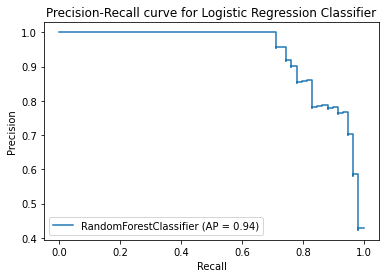

In [25]:
# Print out the Recall-Precision Plot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plt.figure(figsize = (7,7))
plot_precision_recall_curve(CV_rfc.best_estimator_, X_test,Y_test)
plt.title("Precision-Recall curve for Logistic Regression Classifier")

In [26]:
import pickle
pickle.dump(CV_rfc.best_estimator_, open("diabetes.pkl",'wb'))

In [27]:
ls


diabetes.csv  diabetes.pkl  sample_data/


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = lr.predict(X_test)

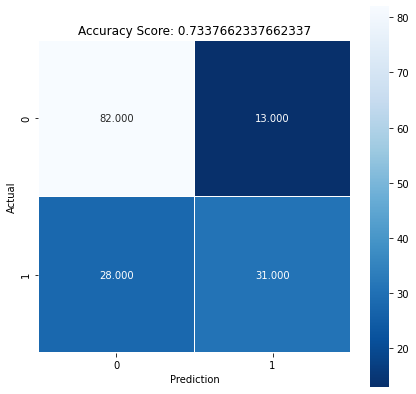

In [31]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)

plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.title("Accuracy Score: {}".format(accuracy_score(Y_test, y_pred)))
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [32]:
print("The recall score for prediction is {:0.2f}".format(recall_score(Y_test, y_pred)))
print("The prescision score for predion is {:0.2f}".format(precision_score(Y_test, y_pred)))
print("\n")
print(classification_report(Y_test,y_pred))

The recall score for prediction is 0.53
The prescision score for predion is 0.70


              precision    recall  f1-score   support

           0       0.75      0.86      0.80        95
           1       0.70      0.53      0.60        59

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.73      0.73      0.72       154

